Load dataset

In [2]:
import pandas as pd
    
df = pd.read_csv("ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


Eksplorasi data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

Mengubah tipe data pada kolom 'Charging start time' & 'Charging end time'

In [4]:
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

Membuat kolom baru 'Day Name'

In [5]:
df['Day Name'] = df['Charging Start Time'].dt.day_name()

Menghapus kolom 'Day of Week'

In [6]:
df = df.drop(columns=['Day of Week'])

Menghapus kolom yang tidak diperlukan

In [7]:
df.drop(columns=["User ID", "Charging Station ID"], inplace=True, errors='ignore')

Cek kolom pada dataset

In [8]:
df.columns

Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)', 'Charger Type', 'User Type',
       'Day Name'],
      dtype='object')

Cek missing value

In [9]:
df.isnull().sum()

Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
Day Name                                     0
dtype: int64

Menangani missing value kolom 'Energy Consumed (KkWh)' dengan 'Charging Duration' * 'Charging Rate (kW)'

In [10]:
mask = df['Energy Consumed (kWh)'].isnull() & (df['Charging Duration (hours)'] != 0)
df.loc[mask, 'Energy Consumed (kWh)'] = df.loc[mask, 'Charging Rate (kW)'] * df.loc[mask, 'Charging Duration (hours)']

Menangani missing value kolom 'Charging Rate (kW)' dengan 'Energy Consumed (KkWh)' / 'Charging Duration' 

In [11]:
mask = df['Charging Rate (kW)'].isnull() & (df['Charging Duration (hours)'] != 0)
df.loc[mask, 'Charging Rate (kW)'] = df.loc[mask, 'Energy Consumed (kWh)'] / df.loc[mask, 'Charging Duration (hours)']

Menangani missing value kolom 'Distance Driven (since last charge) (km)' dengan median

In [12]:
df['Distance Driven (since last charge) (km)'] = df['Distance Driven (since last charge) (km)'].fillna(
    df['Distance Driven (since last charge) (km)'].median())

Cek missing value setelah penanganan

In [13]:
df.isnull().sum()

Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       3
Charging Duration (hours)                   0
Charging Rate (kW)                          3
Charging Cost (USD)                         0
Time of Day                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
Day Name                                    0
dtype: int64

Hapus baris yang masih mengandung missing value

In [14]:
df = df.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)'])

Cek missing value setelah penanganan

In [15]:
df.isnull().sum()

Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
Day Name                                    0
dtype: int64

Cek outlier menggunakan IQR

In [16]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

outlier_counts = {col: count_outliers_iqr(df, col) for col in numerical_cols}

print(pd.Series(outlier_counts).sort_values(ascending=False))


Battery Capacity (kWh)                      33
State of Charge (End %)                     19
Energy Consumed (kWh)                       11
Charging Duration (hours)                    6
Charging Rate (kW)                           4
Charging Cost (USD)                          3
Temperature (°C)                             2
State of Charge (Start %)                    1
Distance Driven (since last charge) (km)     0
Vehicle Age (years)                          0
dtype: int64


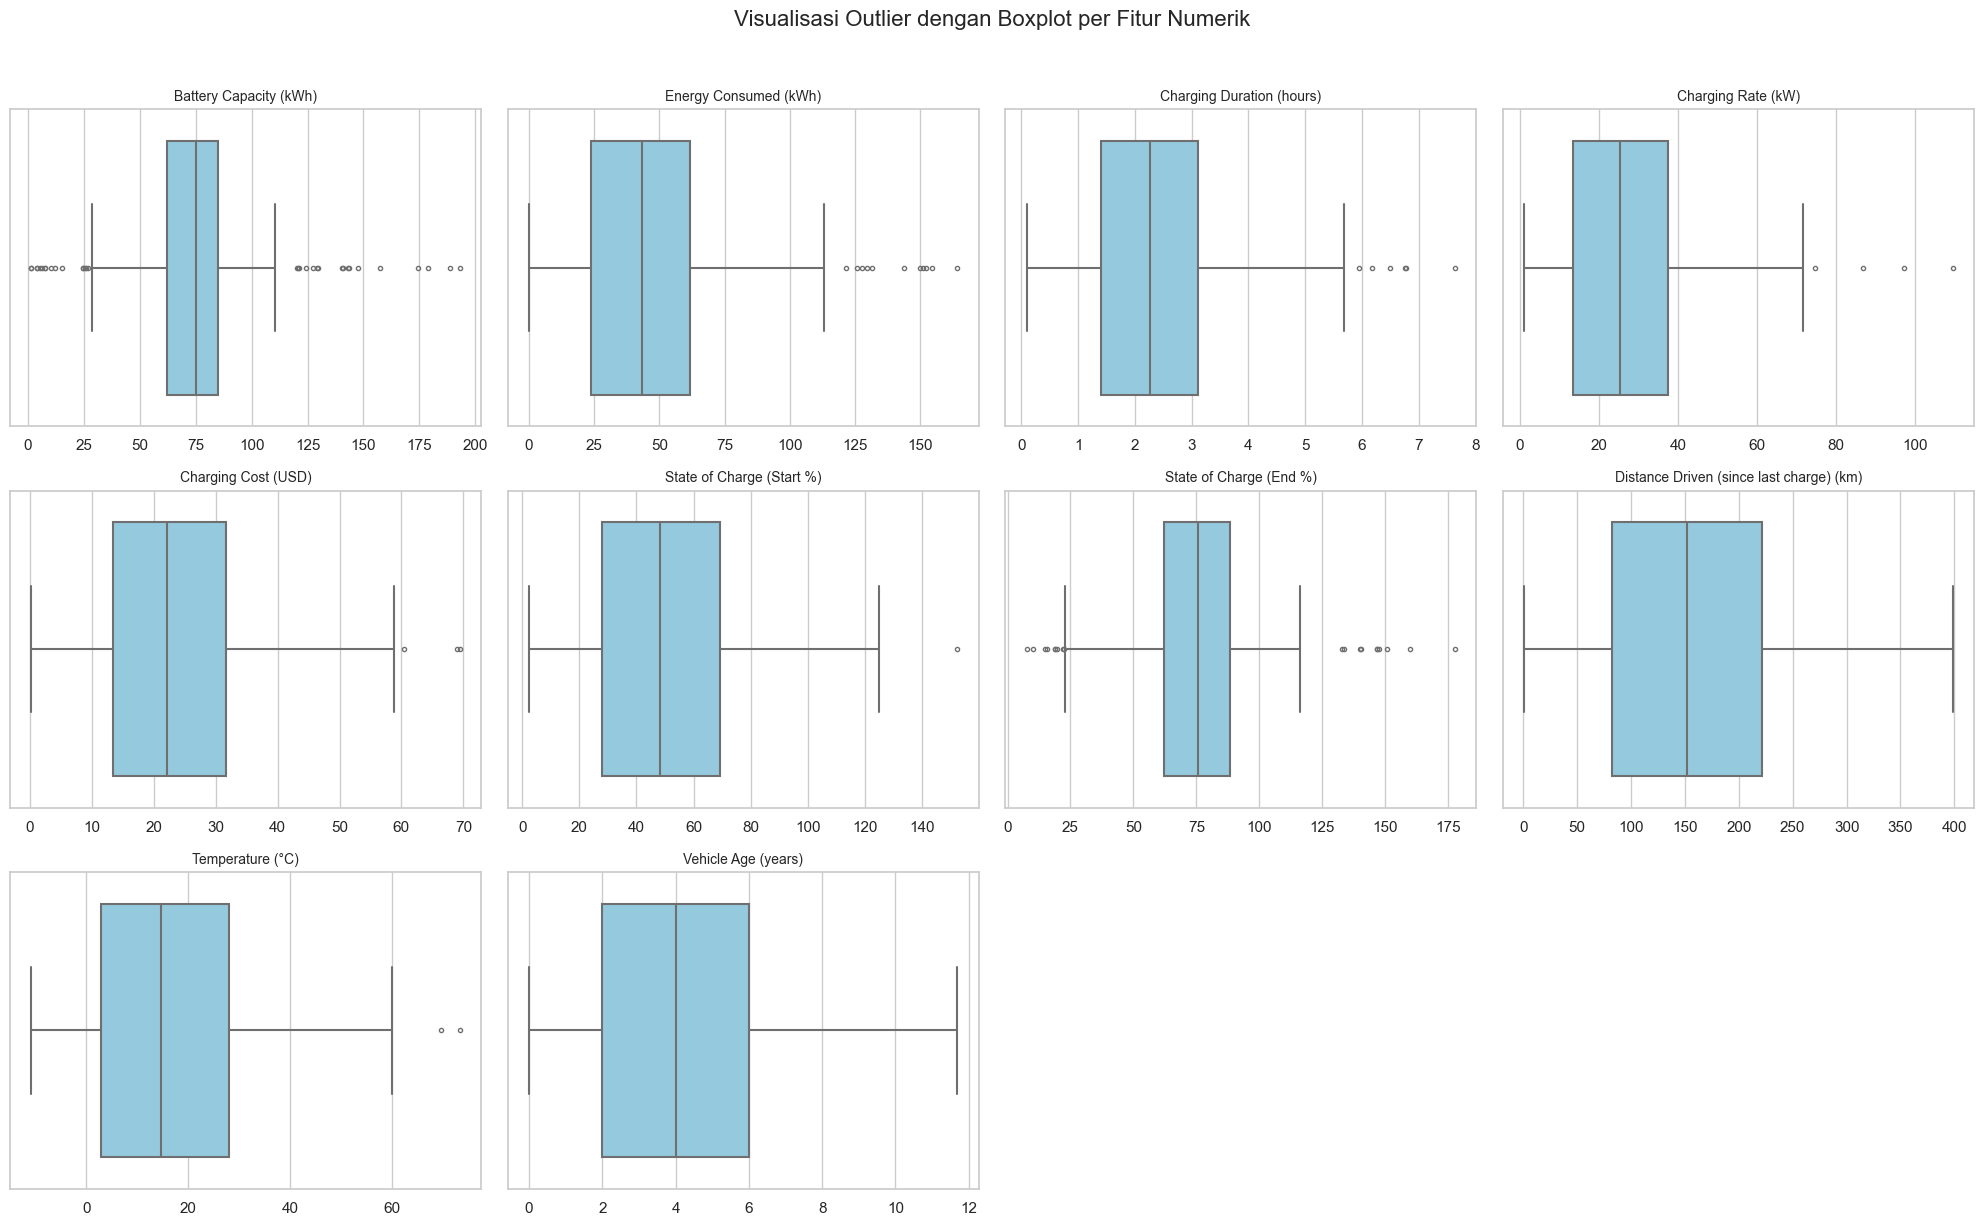

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
sns.set(style="whitegrid")

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue', linewidth=1.5, fliersize=3)
    plt.title(col, fontsize=10)
    plt.xlabel("") 

plt.suptitle('Visualisasi Outlier dengan Boxplot per Fitur Numerik', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Menangani outlier kolom 'Battery Capacity (kWh)', 'State of Charge (End %)', 'Energy Consumed (kWh)' menggunakan median

In [18]:
target_columns = ['Battery Capacity (kWh)', 'State of Charge (End %)', 'Energy Consumed (kWh)']

def replace_outliers_iqr_with_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[col].median()

    df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

for col in target_columns:
    replace_outliers_iqr_with_median(df, col)

Cek outlier setelah ditangani

In [19]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

outlier_counts = {col: count_outliers_iqr(df, col) for col in numerical_cols}

print(pd.Series(outlier_counts).sort_values(ascending=False))

Charging Duration (hours)                   6
Charging Rate (kW)                          4
Charging Cost (USD)                         3
State of Charge (End %)                     3
Temperature (°C)                            2
State of Charge (Start %)                   1
Energy Consumed (kWh)                       0
Battery Capacity (kWh)                      0
Distance Driven (since last charge) (km)    0
Vehicle Age (years)                         0
dtype: int64


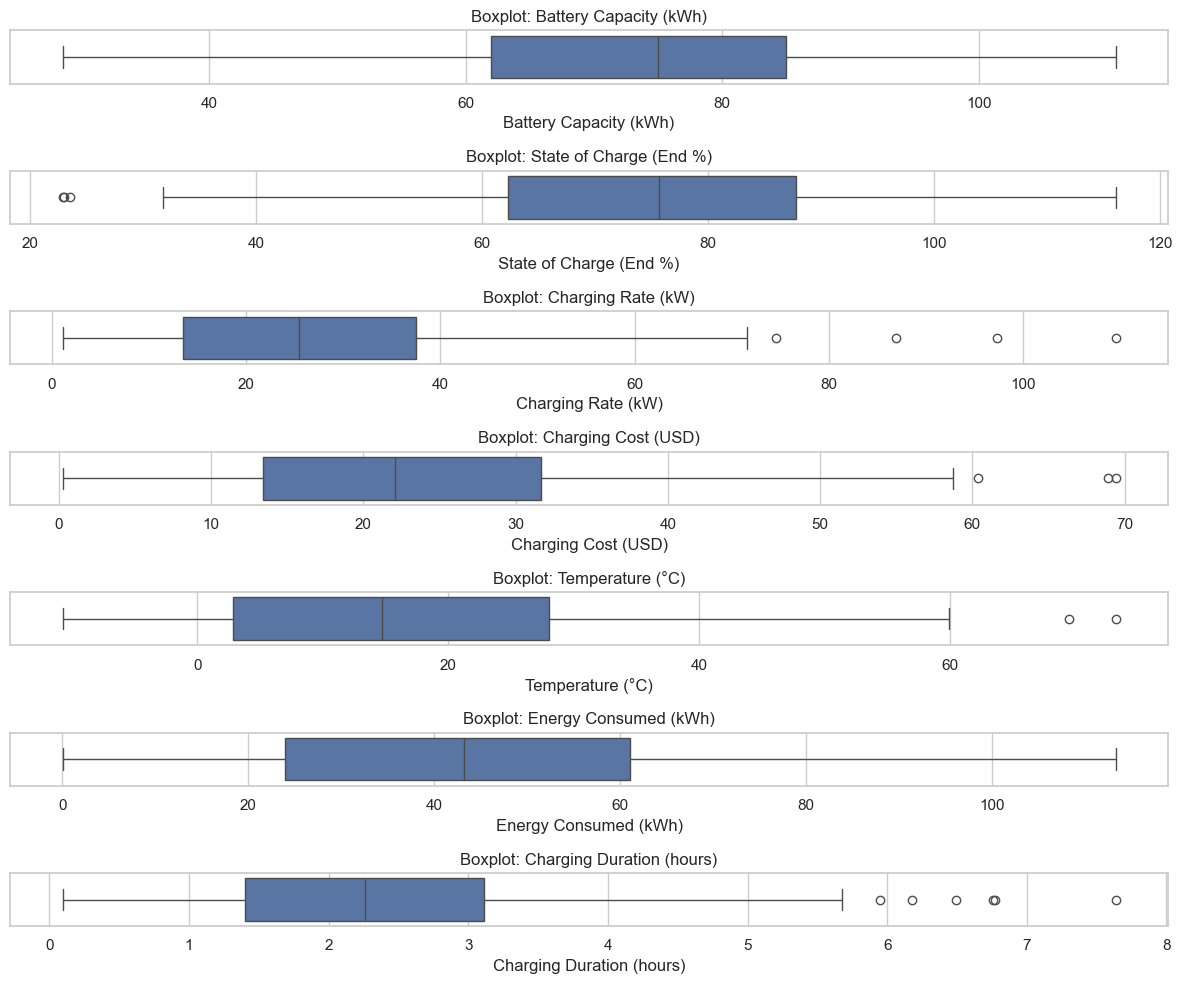

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = [
    'Battery Capacity (kWh)',
    'State of Charge (End %)',
    'Charging Rate (kW)',              
    'Charging Cost (USD)',             
    'Temperature (°C)',
    'Energy Consumed (kWh)',
    'Charging Duration (hours)'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


Visualisasi Distribusi

<Figure size 1500x800 with 0 Axes>

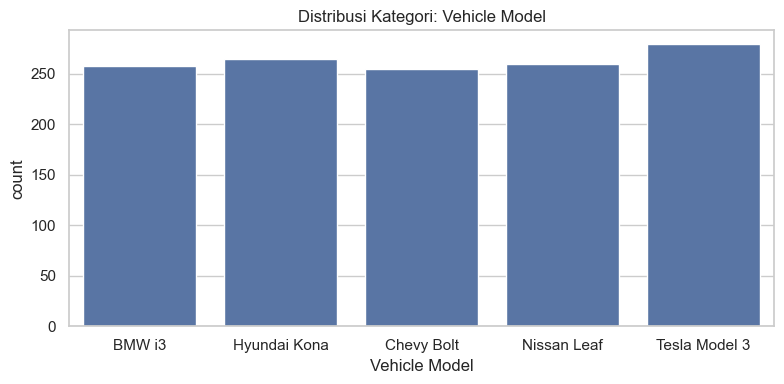

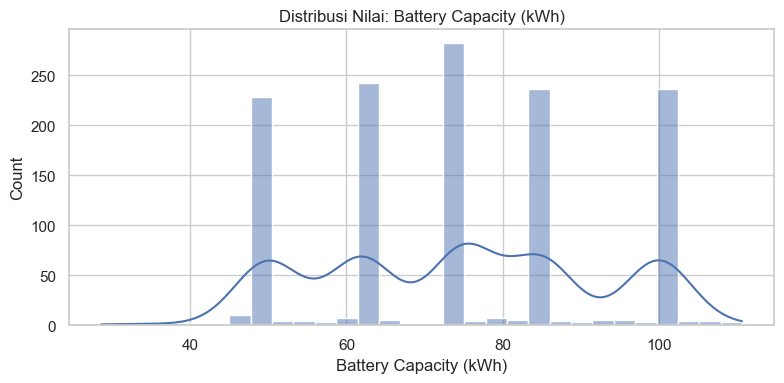

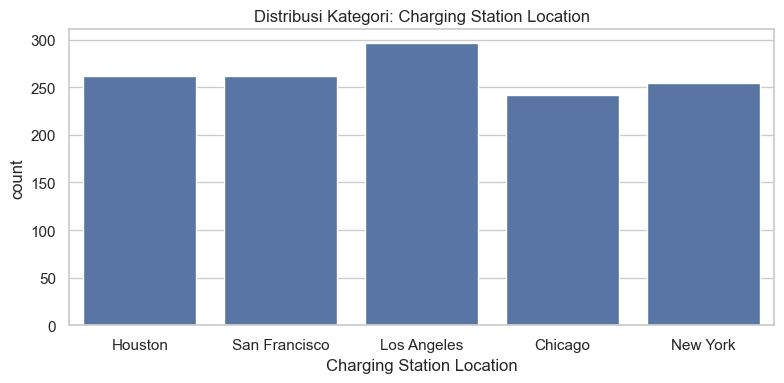

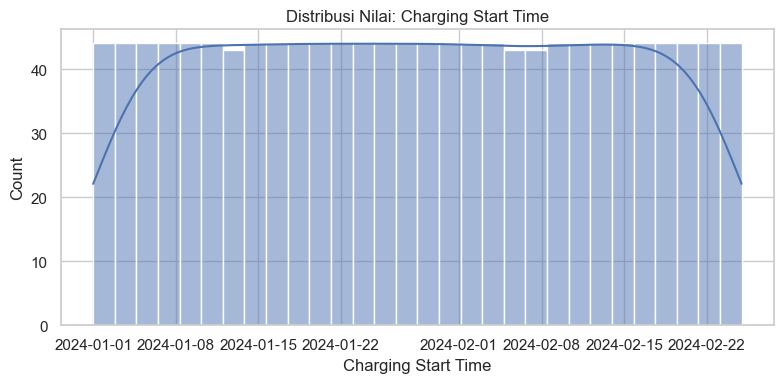

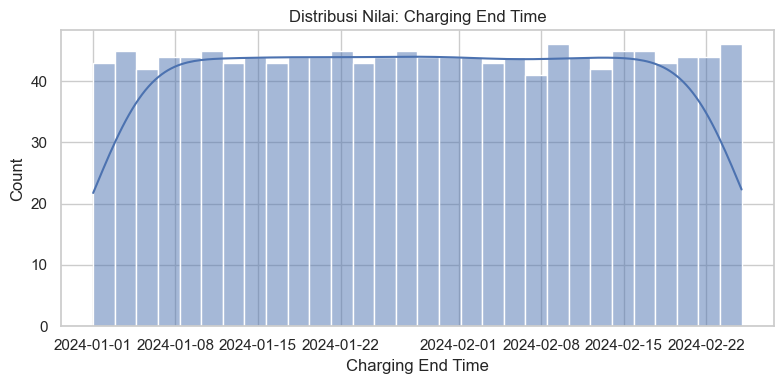

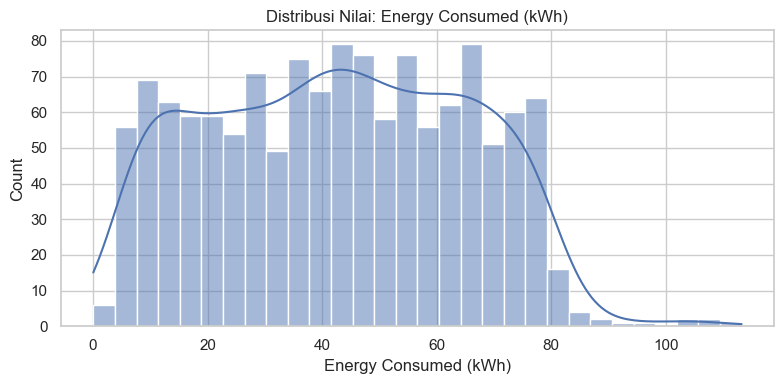

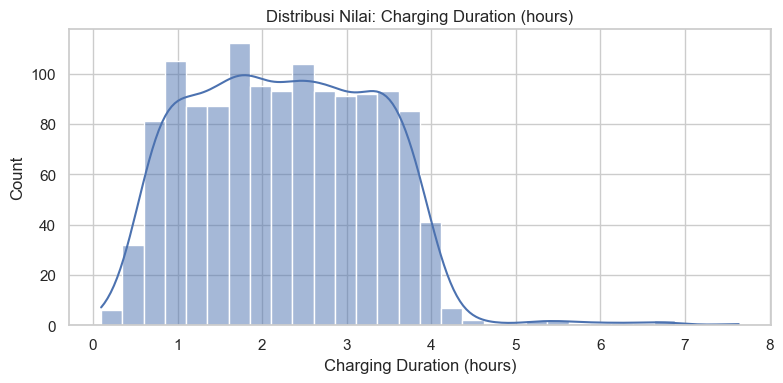

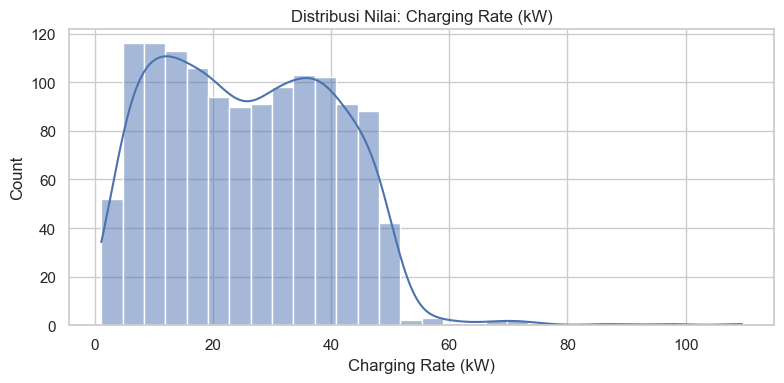

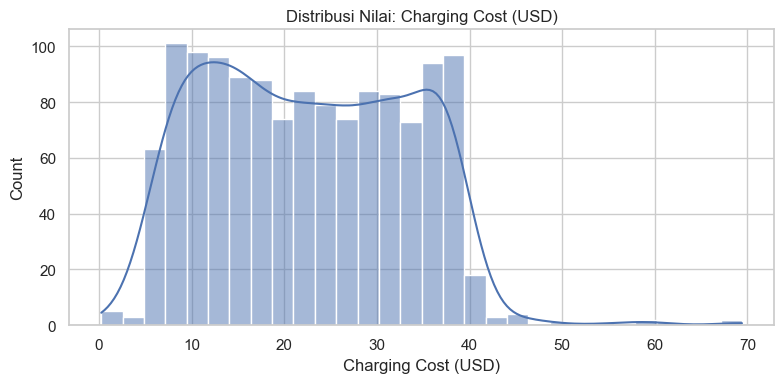

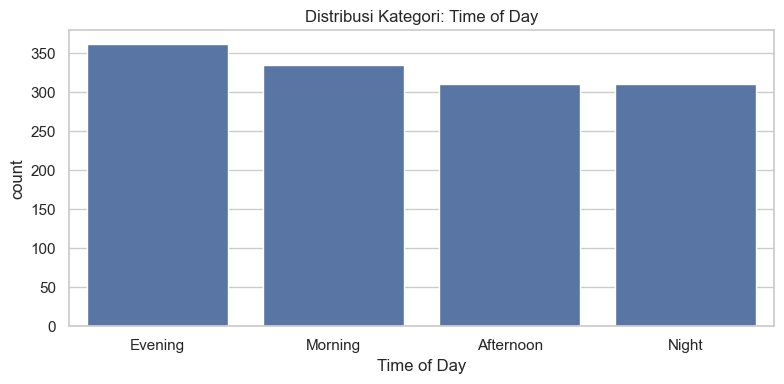

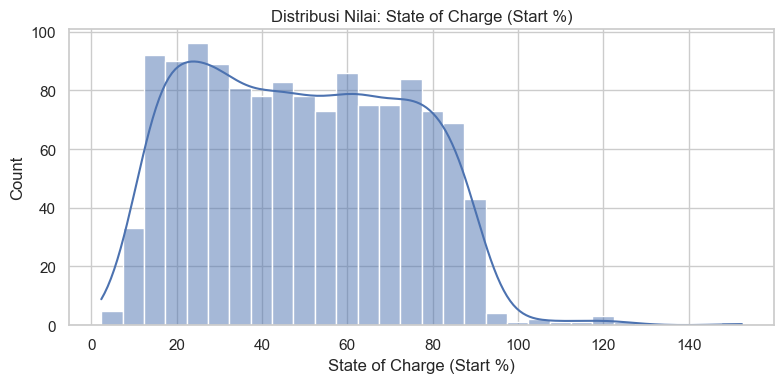

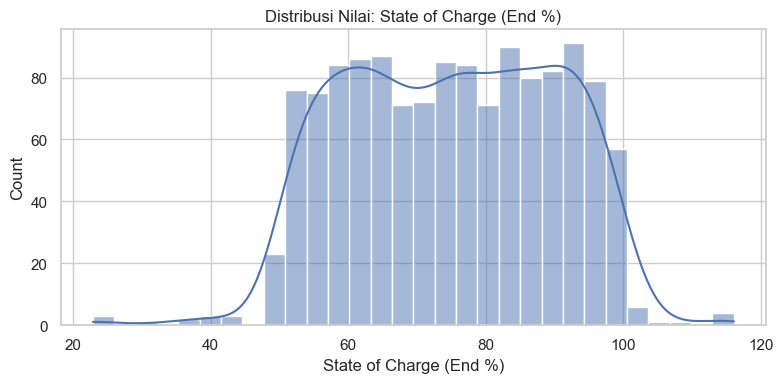

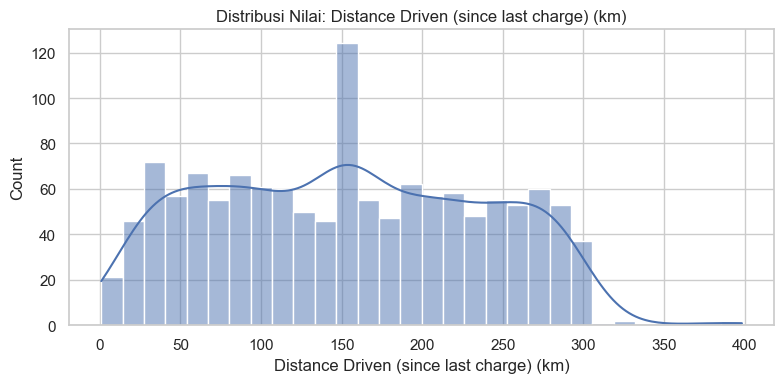

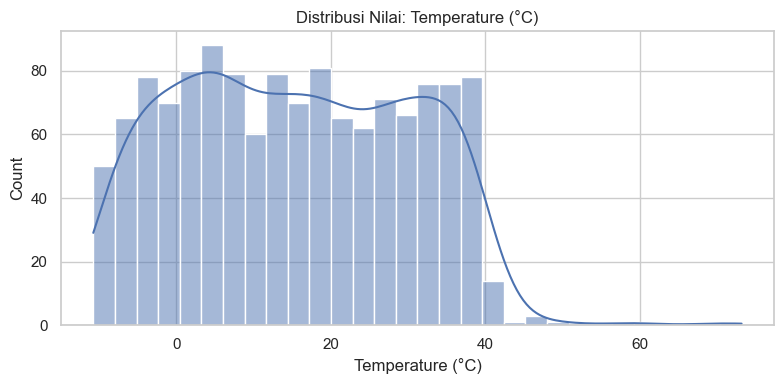

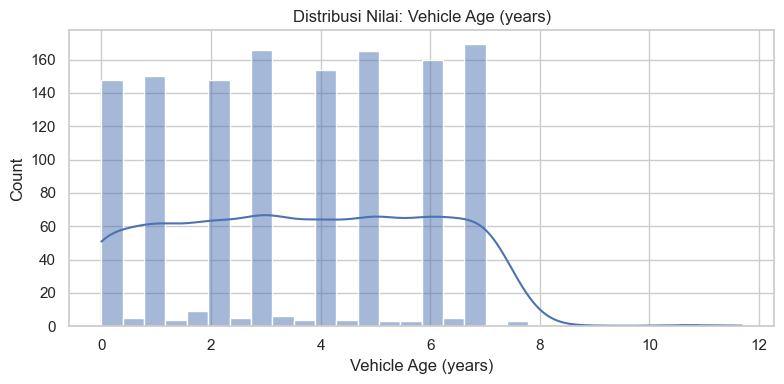

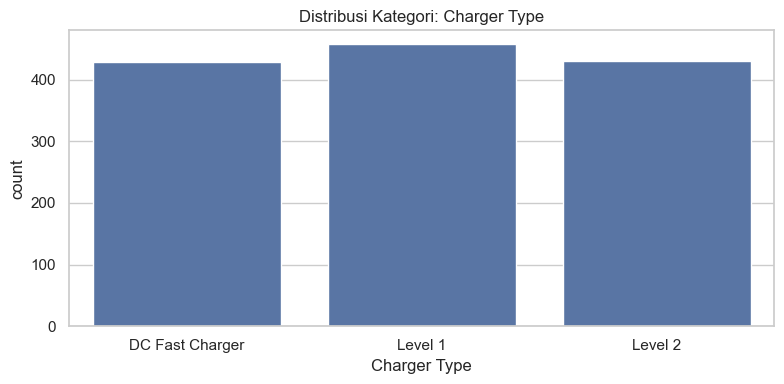

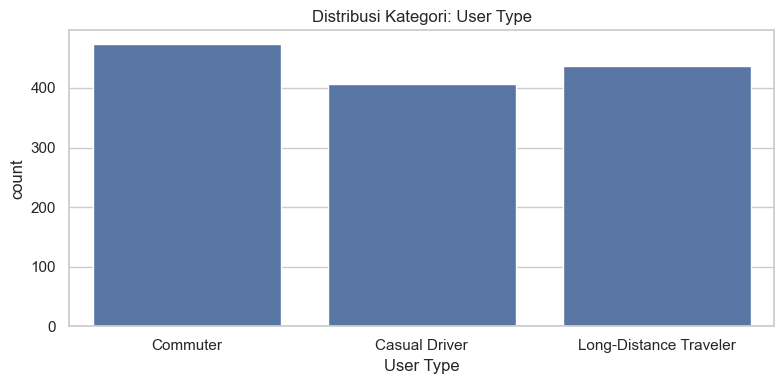

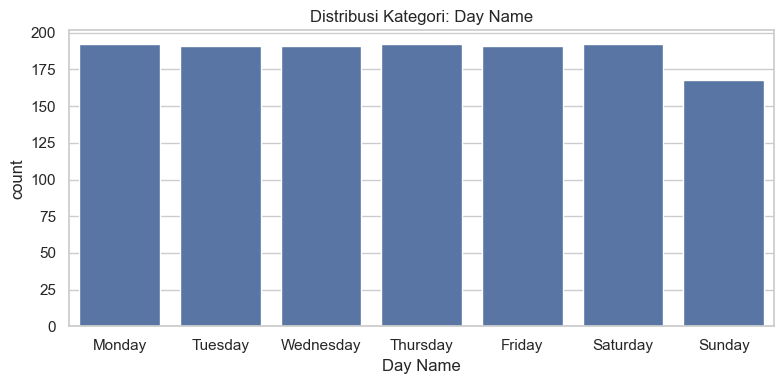

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for column in df.columns:
    plt.figure(figsize=(8, 4))
    if df[column].dtype == 'object':
        # Untuk kolom kategorik
        sns.countplot(data=df, x=column)
        plt.title(f'Distribusi Kategori: {column}')
    else:
        # Untuk kolom numerik
        sns.histplot(df[column].dropna(), kde=True, bins=30)
        plt.title(f'Distribusi Nilai: {column}')
    plt.tight_layout()
    plt.show()

Feature Engineering

In [22]:
def assign_time_slot(dt):
    hour = dt.hour
    if 3 <= hour < 10:
        return 'Pagi'
    elif 10 <= hour < 15:
        return 'Siang'
    elif 15 <= hour < 18:
        return 'Sore'
    elif 18 <= hour < 19:
        return 'Petang'
    elif 19 <= hour < 24:
        return 'Malam'
    else: 
        return 'Malam'

df['Time Slot'] = df['Charging Start Time'].apply(assign_time_slot)


In [23]:
df['Is Weekend'] = df['Day Name'].isin(['Saturday', 'Sunday']).astype(int)

In [24]:
df['Charging Efficiency (kWh/hour)'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']

In [ ]:
df['Cost per kWh'] = df['Charging Cost (USD)'] / df['Energy Consumed (kWh)']

In [26]:
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,...,Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Day Name,Time Slot,Is Weekend,Charging Efficiency (kWh/hour),Cost per kWh
0,BMW i3,108.463007,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,...,293.602111,27.947953,2.0,DC Fast Charger,Commuter,Monday,Malam,0,102.665033,0.215569
1,Hyundai Kona,100.000000,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,...,112.112804,14.311026,3.0,Level 1,Casual Driver,Monday,Malam,0,3.937666,1.712292
2,Chevy Bolt,75.000000,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,...,71.799253,21.002002,2.0,Level 2,Commuter,Monday,Malam,0,7.799260,1.864577
3,Hyundai Kona,50.000000,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,...,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,Monday,Pagi,0,62.741544,0.164065
4,Hyundai Kona,50.000000,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,...,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,Monday,Pagi,0,9.718509,0.517674


Pemilihan fitur dan target (ini enggak kalo untuk clustering)

In [27]:
y = df['Energy Consumed (kWh)']
X = df.drop(columns=['Energy Consumed (kWh)', 'Charging Start Time', 'Charging End Time'])

Mengelompokkan kolom yang numerik

In [28]:
numerical_cols = [
    'Battery Capacity (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)',
    'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Charging Efficiency (kWh/hour)',
    'Is Weekend', 'Cost per kWh'
]

Mengelompokkan kolom yang kategorik

In [29]:
categorical_cols = [
    'Vehicle Model', 'Charging Station Location', 'Time of Day',
    'Charger Type', 'User Type', 'Day Name', 'Time Slot'
]

Normalisasi pada kolom numerik dan One Hot Encoding pada kolom kategorik

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

Membangun model Random Forest Regressor

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

Split data menjadi train dan test

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Melatih model regresi

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Battery Capacity (kWh)',
                                                   'Charging Duration (hours)',
                                                   'Charging Rate (kW)',
                                                   'Charging Cost (USD)',
                                                   'State of Charge (Start %)',
                                                   'State of Charge (End %)',
                                                   'Distance Driven (since '
                                                   'last charge) (km)',
                                                   'Temperature (°C)',
                                                   'Charging Efficiency '
                                                   '(kWh/hour)',
                                                   'Is Weekend',
                                                   'Cost per kWh']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Vehicle Model',
                                                   'Charging Station Location',
                                                   'Time of Day',
                                                   'Charger Type', 'User Type',
                                                   'Day Name',
                                                   'Time Slot'])])),
                ('model', RandomForestRegressor(random_state=42))])

Evaluasi model menggunakan RMSE dan R2 Score

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


RMSE: 4.29
R2 Score: 0.97


Evaluasi kontribusi fitur pada saat membangun model (Berdasarkan berapa banyak pengurangan impurity (seperti MSE pada regresi) yang diberikan oleh fitur tersebut di seluruh pohon)

In [35]:
# Dapatkan model setelah training
model = pipeline.named_steps['model']

# Dapatkan nama fitur setelah preprocessing
encoded_cat_cols = pipeline.named_steps['preprocess'].transformers_[1][1]\
    .get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_cat_cols)

importances = model.feature_importances_
feature_importance_df = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)
print(feature_importance_df.head(15))


Cost per kWh                                0.454186
Charging Efficiency (kWh/hour)              0.373774
Charging Duration (hours)                   0.089759
Charging Cost (USD)                         0.065425
Distance Driven (since last charge) (km)    0.002389
State of Charge (Start %)                   0.001999
State of Charge (End %)                     0.001805
Temperature (°C)                            0.001683
Charging Rate (kW)                          0.001619
Battery Capacity (kWh)                      0.000897
Charger Type_Level 2                        0.000336
Time of Day_Morning                         0.000297
Time of Day_Night                           0.000291
Time of Day_Evening                         0.000286
Time of Day_Afternoon                       0.000284
dtype: float64


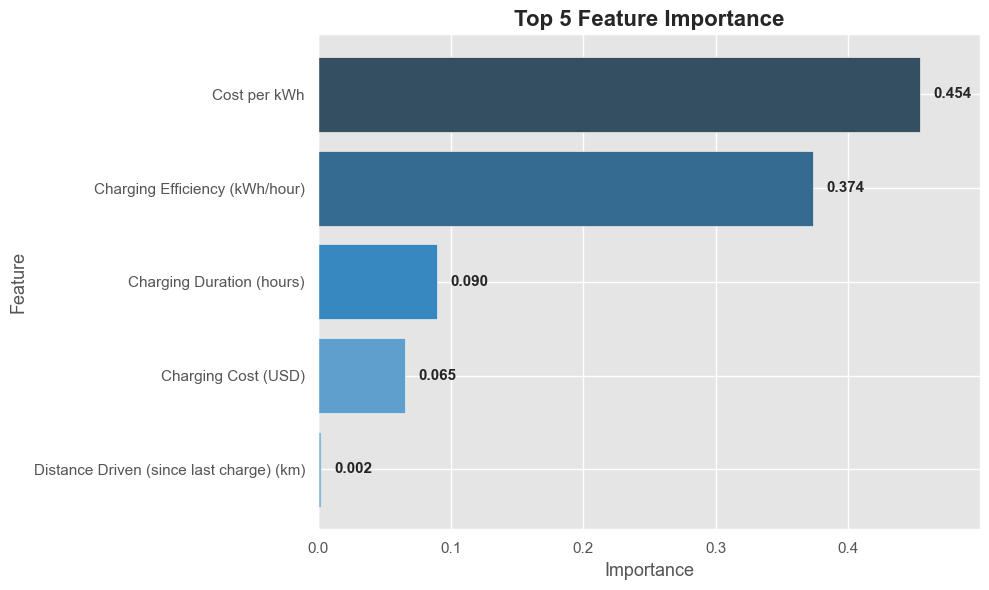

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
top5_features = feature_importance_df.head(5).sort_values()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues_d", len(top5_features))
bars = plt.barh(top5_features.index, top5_features.values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center', fontsize=11, fontweight='bold')

plt.title('Top 5 Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.xlim(0, top5_features.values.max() * 1.1)

plt.tight_layout()
plt.show()


Evaluasi pentingnya fitur kategorikal terhadap target regresi menggunakan pendekatan mutual information

In [37]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd


target = df['Energy Consumed (kWh)']

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
df_encoded = df[categorical_cols].apply(LabelEncoder().fit_transform)
mi = mutual_info_regression(df_encoded, target, discrete_features=True)

mi_series = pd.Series(mi, index=categorical_cols).sort_values(ascending=False)
print("Mutual Information antara fitur kategorik dan target:")
print(mi_series)


Mutual Information antara fitur kategorik dan target:
Time of Day                  0.019784
Time Slot                    0.009427
Vehicle Model                0.009189
Charging Station Location    0.008739
User Type                    0.004502
Charger Type                 0.000000
Day Name                     0.000000
dtype: float64


Konsumsi energi berdasarkan jenis charger

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2992\3383735026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Charger Type', y='Energy Consumed (kWh)', palette=palette)


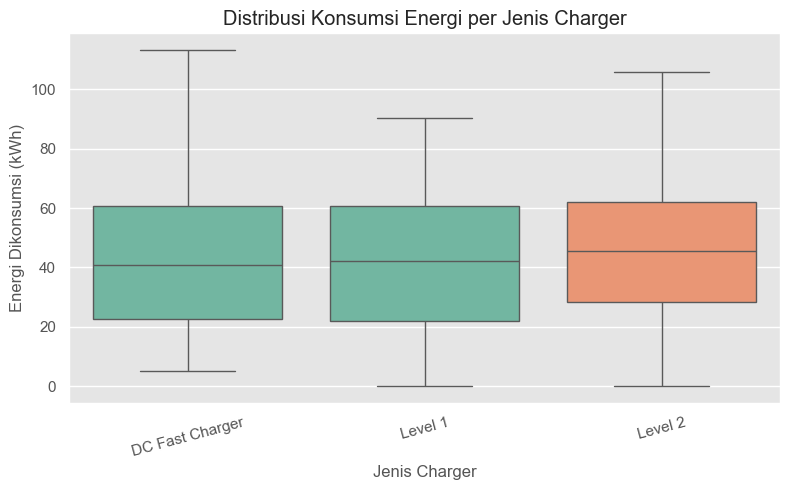

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {
    'DC Fast Charger': '#66c2a5',
    'Level 1': '#66c2a5',       
    'Level 2': '#fc8d62'         
}

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Charger Type', y='Energy Consumed (kWh)', palette=palette)
plt.title('Distribusi Konsumsi Energi per Jenis Charger')
plt.ylabel('Energi Dikonsumsi (kWh)')
plt.xlabel('Jenis Charger')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Konsumsi energi berdasarkan time slot

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2992\291817575.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Time Slot', y='Energy Consumed (kWh)', palette=palette)


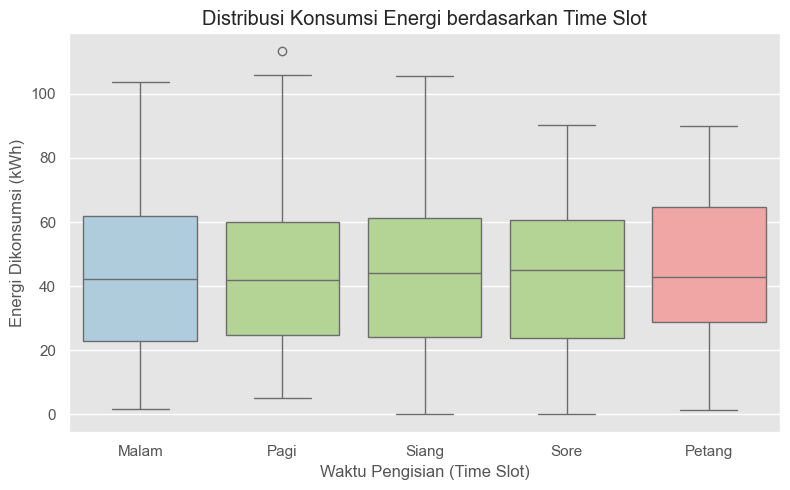

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_energy = df.groupby('Time Slot')['Energy Consumed (kWh)'].mean()

palette = {
    'Malam': '#a6cee3',  
    'Pagi': '#b2df8a',    
    'Siang': '#b2df8a',   
    'Sore': '#b2df8a',    
    'Petang': '#fb9a99'   
}

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Time Slot', y='Energy Consumed (kWh)', palette=palette)
plt.title('Distribusi Konsumsi Energi berdasarkan Time Slot')
plt.ylabel('Energi Dikonsumsi (kWh)')
plt.xlabel('Waktu Pengisian (Time Slot)')
plt.tight_layout()
plt.show()


Rata-rata konsumsi energi per hari

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2992\1383900785.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Day Name', y='Energy Consumed (kWh)', estimator='mean', palette=palette)


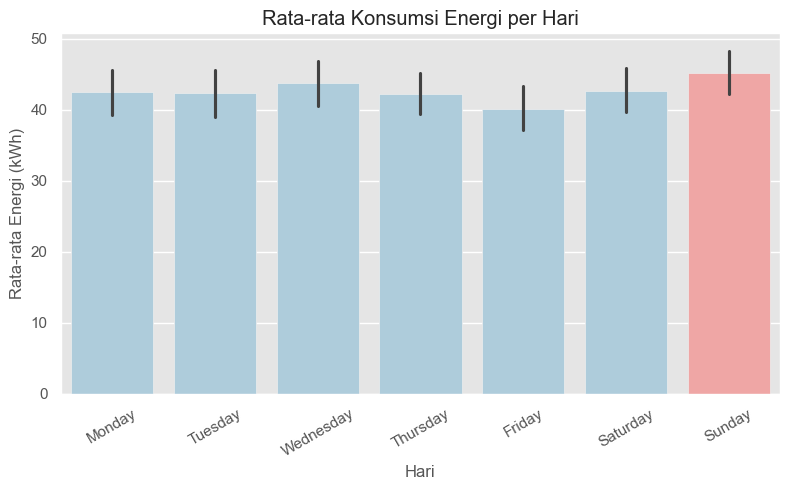

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_energy = df.groupby('Day Name')['Energy Consumed (kWh)'].mean()

threshold = mean_energy.quantile(0.85)  

palette = {}
for day in df['Day Name'].unique():
    if mean_energy[day] >= threshold:
        palette[day] = '#fb9a99' 
    else:
        palette[day] = '#a6cee3' 

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Day Name', y='Energy Consumed (kWh)', estimator='mean', palette=palette)
plt.title('Rata-rata Konsumsi Energi per Hari')
plt.ylabel('Rata-rata Energi (kWh)')
plt.xlabel('Hari')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [41]:
# Tampilkan hasil dalam bentuk angka
print("Rata-rata Konsumsi Energi (kWh) per Hari:")
print(mean_energy.sort_values(ascending=False))  # Urutkan dari yang tertinggi

Rata-rata Konsumsi Energi (kWh) per Hari:
Day Name
Sunday       45.131810
Wednesday    43.825236
Saturday     42.692338
Monday       42.575954
Tuesday      42.349259
Thursday     42.198945
Friday       40.168808
Name: Energy Consumed (kWh), dtype: float64


Efisiensi pengisian terhadap suhu

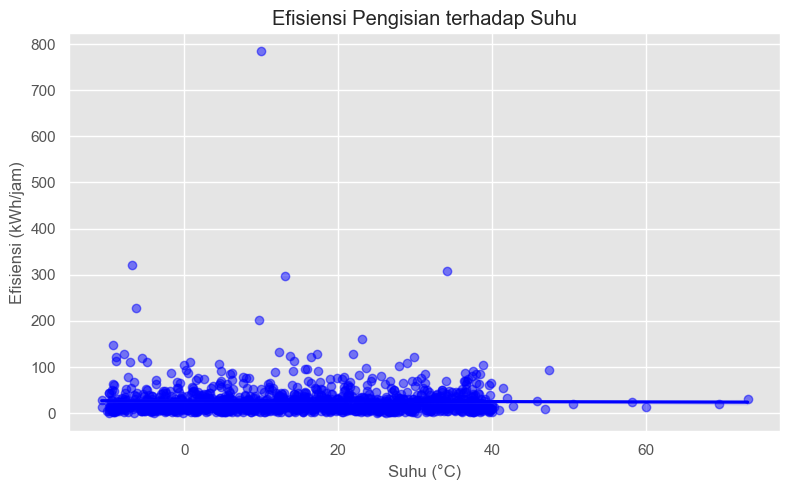

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='Temperature (°C)',
    y='Charging Efficiency (kWh/hour)',
    scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
    line_kws={"color": "blue"}                  
)
plt.title('Efisiensi Pengisian terhadap Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Efisiensi (kWh/jam)')
plt.tight_layout()
plt.show()

Plot aktual vs prediksi (model insight)

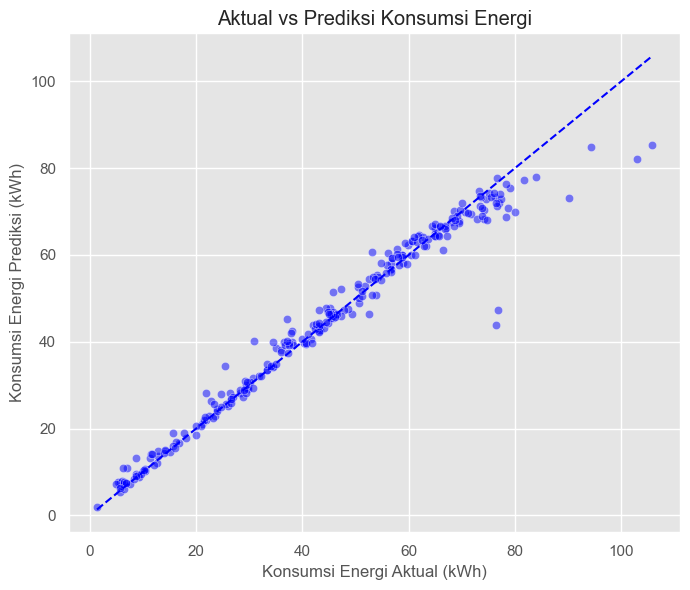

In [43]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')  # garis biru putus-putus
plt.xlabel('Konsumsi Energi Aktual (kWh)')
plt.ylabel('Konsumsi Energi Prediksi (kWh)')
plt.title('Aktual vs Prediksi Konsumsi Energi')
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
import plotly.express as px


energy_per_location = df.groupby("Charging Station Location")["Energy Consumed (kWh)"].sum().reset_index()

fig = px.bar(
    energy_per_location,
    x="Charging Station Location",
    y="Energy Consumed (kWh)",
    color="Energy Consumed (kWh)",
    color_continuous_scale="Reds",
    title="Total Energy Consumed per Charging Station Location"
)

fig.update_layout(
    xaxis_title="Charging Station Location",
    yaxis_title="Total Energy Consumed (kWh)",
    coloraxis_colorbar=dict(title="Energy (kWh)"),
    xaxis_tickangle=45
)

fig.show()


In [45]:
print("Jumlah energi yang dikonsumsi selama dua bulan terakhir:")
print(energy_per_location.sort_values("Energy Consumed (kWh)", ascending=False))


Jumlah energi yang dikonsumsi selama dua bulan terakhir:
  Charging Station Location  Energy Consumed (kWh)
2               Los Angeles           12124.927051
1                   Houston           11603.105514
4             San Francisco           11097.919654
3                  New York           10893.541329
0                   Chicago           10467.930853


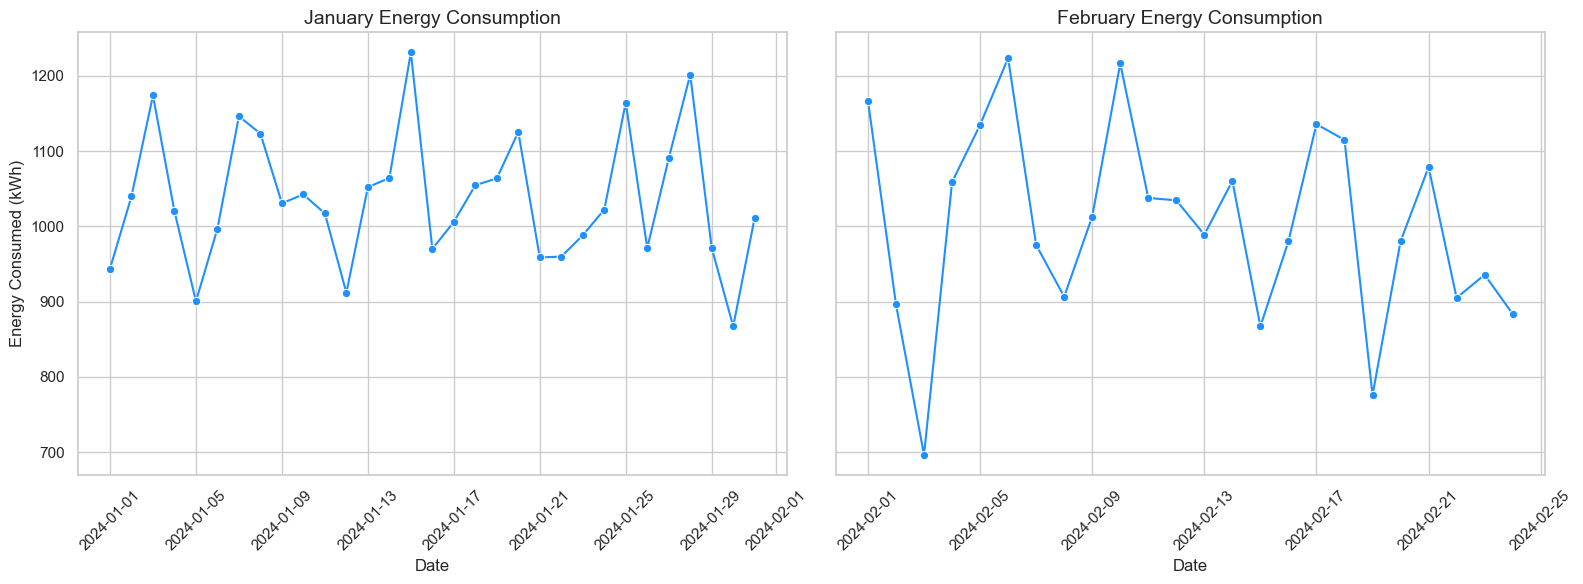

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Date'] = df['Charging Start Time'].dt.date
df['Month'] = df['Charging Start Time'].dt.month

daily_energy = df[df['Month'].isin([1, 2])].groupby(['Month', 'Date'])['Energy Consumed (kWh)'].sum().reset_index()
daily_energy['Month'] = daily_energy['Month'].map({1: 'January', 2: 'February'})

jan_data = daily_energy[daily_energy['Month'] == 'January']
feb_data = daily_energy[daily_energy['Month'] == 'February']

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Januari
sns.lineplot(
    ax=axes[0],
    data=jan_data,
    x='Date',
    y='Energy Consumed (kWh)',
    marker='o',
    color='dodgerblue'
)
axes[0].set_title('January Energy Consumption', fontsize=14)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Energy Consumed (kWh)')
axes[0].tick_params(axis='x', rotation=45)

# Februari
sns.lineplot(
    ax=axes[1],
    data=feb_data,
    x='Date',
    y='Energy Consumed (kWh)',
    marker='o',
    color='dodgerblue'
)
axes[1].set_title('February Energy Consumption', fontsize=14)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('')

axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
